In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/odhia/OneDrive/Desktop/datascienceproject/data/Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [6]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


### let's check and remove outliers

In [7]:
column_with_outliers = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness']
print(f"Shape of data with outliers is; {df.shape}")
for col in column_with_outliers:
    upper = df[col].mean() + (2*df[col].std())
    lower = df[col].mean() - (2*df[col].std())
    df = df[(df[col] < upper) & (df[col] > lower)]
print(f"Shape of data without outliers is; {df.shape}")

Shape of data with outliers is; (569, 6)
Shape of data without outliers is; (443, 6)


In [8]:
df['diagnosis'].value_counts()

diagnosis
1    329
0    114
Name: count, dtype: int64

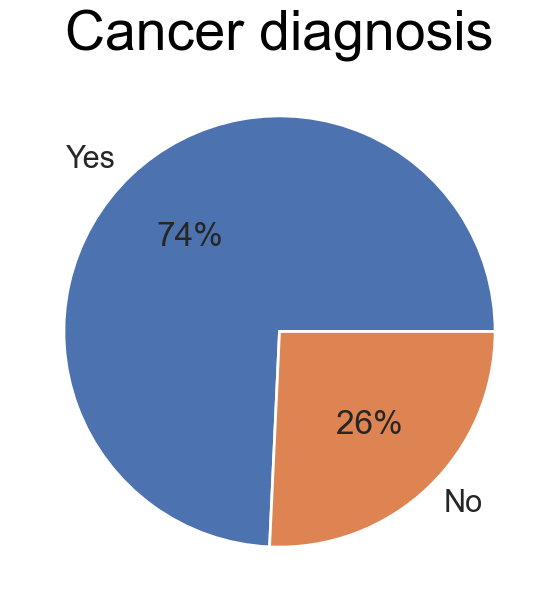

In [9]:
labels=['Yes','No']
values=df['diagnosis'].value_counts().values

sns.set_theme(context='poster')
plt.figure(figsize=(7,7))
plt.title('Cancer diagnosis', color="Black",fontsize=40 )

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.show()


In [10]:
df.to_csv('C:/Users/odhia/OneDrive/Desktop/datascienceproject/data/clean_df.csv',index=False)